In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [152]:
palette = sns.color_palette("plasma", 8).as_hex()

colour_scheme = {'Tome et al.': palette[0],
'L1 Loss': palette[1],
'Spatial TFM': palette[2],
'Seq. Latent Model': palette[3],
'Direct 3D reg.': palette[4],
'Ego-STAN Slice': palette[5],
'Ego-STAN Avg': palette[6],
'Ego-STAN FMT': palette[7]}

#['#be254a', '#dc484c', '#ef6645', '#f88c51', '#ef6645', '#fed27f', '#ef6645', '#fffebe', 
#'#f0f9a7', '#d8ef9b', '#f0f9a7', '#89d0a4', '#60bba8', '#3f97b7', '#4273b3']

In [139]:
joints = ['Head',	'Neck',	'LeftArm',	'LeftForeArm',	'LeftHand',	'RightArm',	'RightForeArm',	'RightHand',	
'LeftUpLeg',	'LeftLeg',	'LeftFoot',	'LeftToeBase',	'RightUpLeg',	'RightLeg',	'RightFoot',	'RightToeBase']

In [140]:
hatches = ["/" , "\\" , "+" , "x", "o", "O", ".", "*"]
avg = {}
std = {}


In [199]:
baseline_avg = [16.4,	3.7,	34.9,	59.4,	89.1,	32.6,	61.0,	86.7,	61.9,	79.2,	87.4,	98.3,	61.3,	82.3,	93.6,	103.9]
baseline_std = [0.6,	0.8,	3.7,	1.3,	8.3,	3.1,	0.4,	7.6,	7.5,	1.0,1.7,	1.0,	9.4,	2.3,	2.2,	3.5]

baseline_l1_avg = [16.4,	2.4,	31.8,	55.0,	78.9,	31.3,	57.5,	76.5,	52.8,	76.5,	82.7,	90.5,	53.0,	77.5,	85.8,	93.0]
baseline_l1_std = [1.1,	0.2	,3.0,	3.0	,5.1,	2.8	,3.2,	5.1,	4.2,	5.1	,6.1,	7.4	,2.6,	2.5	,2.4,	2.9]

baseline_direct_avg = [14.9,	7.0,	20.9,	38.6,	73.2,	21.0,	38.4,	69.3,	46.4,	60.2,	73.2,	81.2,	46.5,	61.2,	80.5,	86.2]
baseline_direct_std = [0.4,	0.2,	0.6,	0.3,	0.7,	0.4,	0.0,	1.3,	1.9,	1.6,	1.8,	3.0	,1.9,	2.9	,2.9,	4.1]

spatial_tfm_avg = [13.1,	7.4,	20.6,	40.1,	76.0,	19.7,	43.3,	80.6,	48.6,	61.8,	74.7,	80.7,	48.9,	61.9,	78.4,	84.2]
spatial_tfm_std = [1.4,	2.3	,2.9,	4.0	,4.1,	2.3,	2.7,	5.2	,1.6,	2.0	,5.0,	5.5	,1.8,	2.7	,6.4,	6.2]

seq_avg = [21.7,	11.2,	34.9,	55.6,	68.6,	37.8,	57.1,	68.2,	62.6,	65.7,	64.0,	72.6,	63.2,	68.1,	66.7,	73.3]
seq_std = [3.4,	4.8	,1.9,	0.7,	1.1,	6.6,	3.1,	5.1,	2.0,	4.8,	5.9,	7.2,	4.7,	4.1,	5.4,	5.8]

ego_slice_avg = [10.7,	2.4	,17.3,	32.3,	60.0,	17.6,	35.6,	65.9,	39.4,	51.9,	60.0,	64.4,	40.6,	52.8,	65.7,	68.9]
ego_slice_std = [0.5,	0.1,	0.3,	0.8,	3.3,	0.7,	2.5,	3.7	,1.1,	0.9,	1.6,	2.4	,1.2,	0.5,	1.2,	1.6]

ego_avg_avg = [10.6,	2.3,	18.3,	30.5,60.2,	18.9,	34.1,	64.1,	40.1,	52.1,	57.6,	65.8,	40.6,	51.5,	60.2,	66.3]
ego_avg_std = [1.6,	0.2	,1.2,	1.6,	3.7,	1.2,	2.6,	3.8,	3.8,	3.0,	3.2	,3.6,	3.9	,4.0,	4.8,	4.7]

ego_avg = [11.4	,1.3,	17.7,	32.8,	53.1,	17.7	,34.9	,56.6,	41.9,	50.6,	54.1,	61.2,	41.7,	50.8,	57.5,	63.0]
ego_std = [0.5,	0.2,	1.2,	4.1,	1.2,	1.0,	3.7,	1.8,	1.2,	1.2,	0.5,	1.9,	0.8,	1.4,	2.4,	1.5]

averages = [baseline_avg, baseline_l1_avg, spatial_tfm_avg, seq_avg, baseline_direct_avg, ego_slice_avg, ego_avg_avg, ego_avg]
stds = [baseline_std, baseline_l1_std, spatial_tfm_std, seq_std, baseline_direct_std, ego_slice_std, ego_avg_std, ego_std]


In [210]:
def bar_plot(ax, data, stds, idx, colors=None, total_width=0.8, single_width=1):
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    # Iterate over all data
    for i, model in enumerate(data):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2
        if idx == 0:
            model_data = model[:8]
            std_data = stds[i][:8]
            ax.set_title('Upper Body MPJPE', fontsize=20)
        else:
            model_data = model[8:]
            std_data = stds[i][8:]
            ax.set_title('Lower Body MPJPE', fontsize=20)
     
        # Draw a bar for every value of that type
        for x, y in enumerate(model_data):
            if x == 0 and idx == 0:
                ax.bar(x + x_offset, y, yerr=std_data[x], width=bar_width * single_width, label=list(colour_scheme.keys())[i],
                       color=colors[i % len(colors)], capsize=2, zorder=3, alpha=0.8)#hatch=hatches[i]
            else:
                ax.bar(x + x_offset, y, yerr=std_data[x], width=bar_width * single_width,
                       color=colors[i % len(colors)], capsize=2, zorder=3, alpha=0.8) #hatch=hatches[i],

    

    if idx == 0:
        ax.set_xticklabels(['']+joints[:8], fontsize=24)
    else:
        ax.set_xticklabels(['']+joints[8:], fontsize=24)



/Users/Siri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/Siri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator


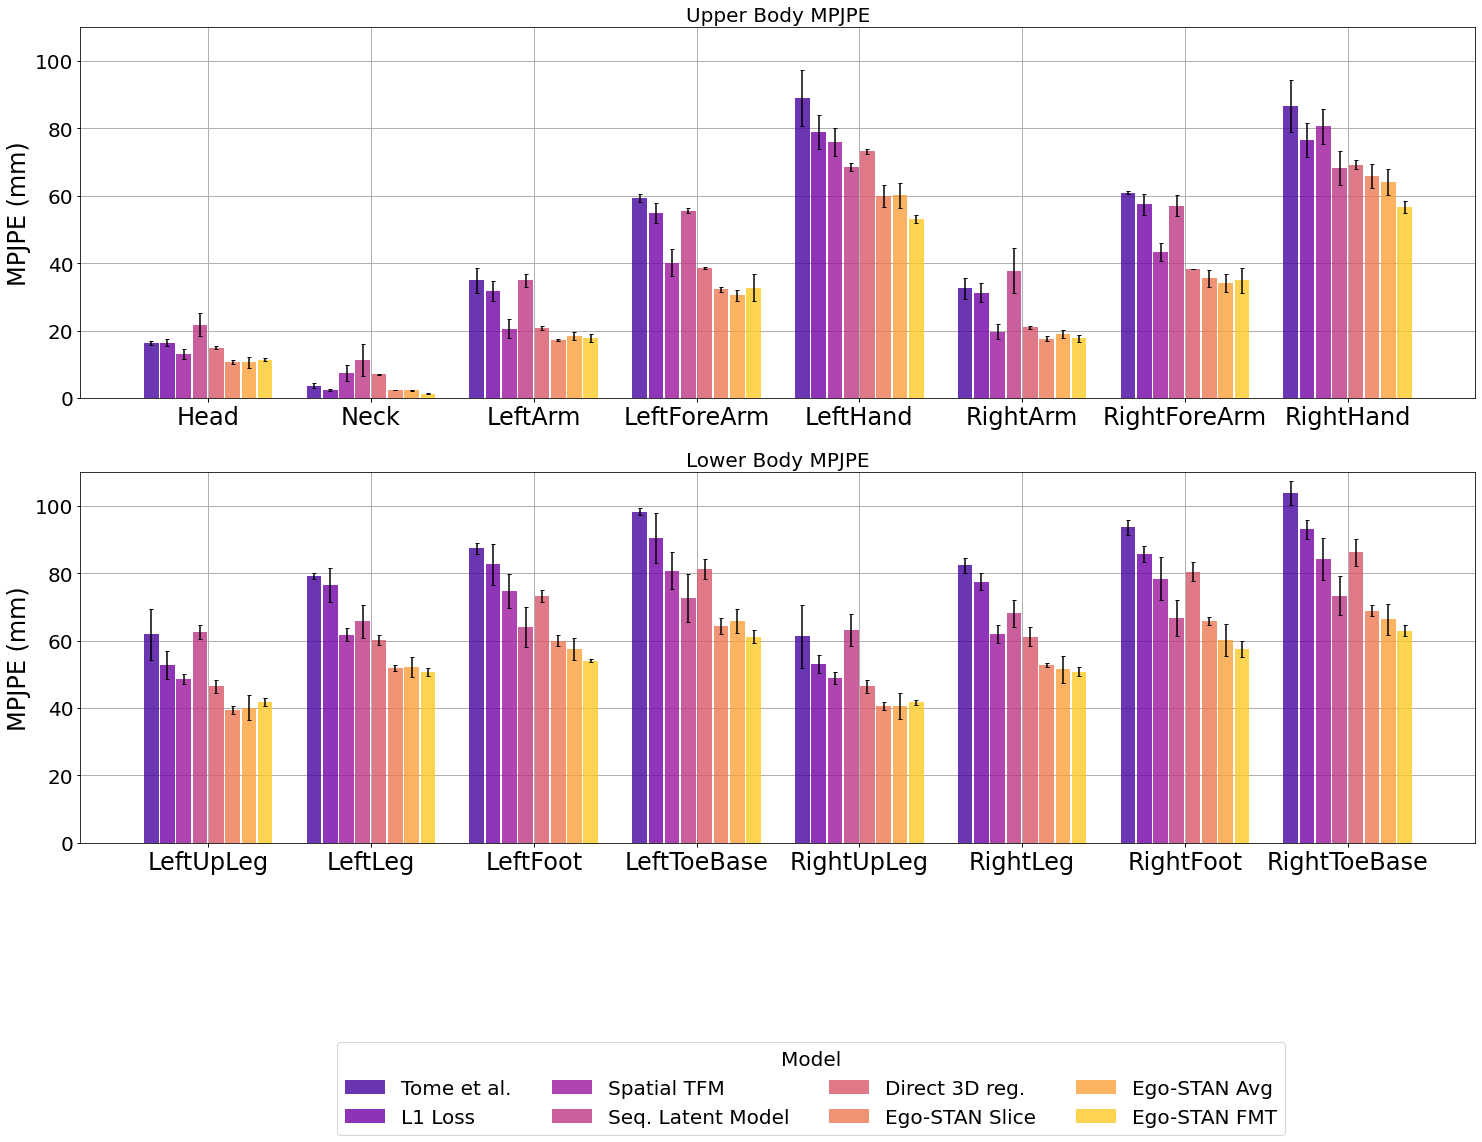

In [214]:
fig, axlist = plt.subplots(2, 1, figsize=(25,15))
for i, ax in enumerate(axlist.flatten()):
   
    bar_plot(ax, averages, stds, i, colors=list(colour_scheme.values()), total_width=0.8, single_width=0.9)
    ax.set_ylabel('MPJPE (mm)', fontsize=24)
    ax.set_ylim(0, 110)
    ax.xaxis.set_tick_params(width=1)
    ax.yaxis.set_tick_params(width=1)
    ax.grid(zorder=0, linewidth=1)
    plt.setp(ax.get_yticklabels(), fontsize=20)
    plt.subplots_adjust(hspace=0.2)
    
    


lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
legend = fig.legend(lines, labels, title='Model', bbox_to_anchor=(0.8, -0.05), ncol=4, fontsize=20)
legend.get_title().set_fontsize('20')
# #fig.savefig('/home/eddie/waterloo/lightning_logs/violin_plots/bar_plot_per_joint.pdf', bbox_inches='tight', format='pdf')

In [212]:
axlist.flatten()

AttributeError: 'AxesSubplot' object has no attribute 'flatten'